<img alt="logo" height="100" src="img/logo.jpeg" width="100"/>   

# REGRESIÓN LINEAL #
### Definición ###
Hay diferentes tipos de regresión lineal, y la más sencilla y práctica para aprender machine learning es la **regresión lineal simple**. Esta consta de una variable independiente y otra variable dependiente, pudiendo existir una relación entre ambas variables que hará que, a medida que aumenta el valor de una la otra lo haga proporcionalmente.  

En estadística, la **regresión lineal simple** (o el ajuste lineal) es un modelo matemático utilizado para encontrar la relación de dependencia entre una variable dependiente (y) y otra independiente (X). En el caso de la regresión lineal múltiple buscaría la relación entre una variable dependiente y 'm' variables independientes.   


 <img width="460" height="300" src="img/linealregresion.png" >   


### Desarrollo de un modelo de regresión lineal en Python ###

Se va a ir generando el código de la regresión lineal simple paso a paso para una mejor compresión 

### PASO 1 - GENERACIÓN DEL DATAFRAME (PANDAS) CON LOS DATOS A ANALIZAR ###

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ------------------------------------
# Crear dataframe con los datos de facturación de clientes
data = {'customer_id': [1, 2, 3, 4, 5],
        'billing_amount': [100, 200, 150, 300, 250],
        'sales': [2, 4, 3, 6, 5]
}
clients = pd.DataFrame(data)

### PASO 2 - ANÁLISIS INICIAL DEL CONTENIDO DEL DATAFRAME ###

Se muestran, a modo de comprobación,  los datos almacenados en el dataframe

In [2]:
print(clients)

   customer_id  billing_amount  sales
0            1             100      2
1            2             200      4
2            3             150      3
3            4             300      6
4            5             250      5


Se comprueban los tipos de datos contenidos en el conjunto de datos y las dimensiones dataframe

In [3]:
print(clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     5 non-null      int64
 1   billing_amount  5 non-null      int64
 2   sales           5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes
None


Se muestra la información sobre las dimensiones del dataframe

In [4]:
print(clients.shape)

(5, 3)


### PASO 3 - PARTICIONADO DE DATOS PARA GENERAR CONJUNTOS TRAIN Y TEST ###

In [5]:
X_train, X_test, y_train, y_test = train_test_split(clients['billing_amount'], clients['sales'], random_state=20)

Con esta línea de código indicamos que se cree, genere y divida los datos de cliente en varios conjuntos de datos de entrenamiento y prueba:  

- Datos de entrada: 'customer_id'.
- Variable dependiente: 'billing_amount', importe de facturación del cliente.
- random_state: se genera una semilla aleatoria para dividir los datos de forma consistente cada vez que ejecutamos el código.
- X_train: datos de entrada del conjunto de entrenamiento. Información que se usa para entrenar el modelo.
- X_test: datos de entrada del conjunto de prueba. Información que se usa para testear el rendimiento del modelo ya entrenado.
- y_train: datos de salida del conjjunto de entrenamiento. Información objetivo que se usa para entrenar el modelo.
- y_test: datos de salida del conjunto de prueba. Información objetivo que se usa para testear el rendimiento del modelo ya entrenado.
  
Realizar esta partición es crucial para evaluar el rendimiento del modelo entrenado.

### Creación del Modelo de regresión lineal simple ###

In [6]:
lr = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

#### Predicción ###
Usamos el conjunto de test para realizar la predicción usando el modelo entrenado.

In [7]:
y_pred = lr.predict(X_test.values.reshape(-1, 1))

NOTA: X_test contiene los datos de entrada del conjunto de prueba. Con el "reshape(-1,1)" o con ".values.reshape(-1, 1)" se pretende redimensionar la matriz a las dimensiones que requiere el modelo LinearRegression() de SciKit-Learn. Según el conjunto de datos utilizado, es posible añadir directamente la variable o puede que sea necesario redimensionarla usando **reshape** o **values.reshape**.

#### Visualización de coeficientes mínimos cuadrados W1 y W0 ####

In [8]:
print("Coeficiente w1:", lr.coef_)
print("Coeficiente w0:", lr.intercept_)

Coeficiente w1: [0.02]
Coeficiente w0: 4.440892098500626e-16


#### Error cuadrático medio ####
El **error cuadrático medio (ECM o RMSE)** mide la diferencia al cuadrado entre el valor real y el valor predicho en el total de predicciones del modelo de Machine Learning utilizado, mostrando las diferencias más elevadas.  
En estadística, el error cuadrático medio es un estimador que mide el promedio de errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. Es un parámetro perfecto para medir la cantidad de error entre dos conjuntos de datos. Una explicación sencilla es decir que compara el valor predicho con el valor conocido, dando como resultado un coeficiente de error.

In [9]:
print(mean_squared_error(y_test, y_pred))

0.0


Por tanto, un valor bajo de RMSE supone un muy buen ajuste del modelo.

#### Coeficientes de determinación ####  

El coeficiente de determinación de entrenamiento y de pruebas debe ser parecido. Cuando encontramos que ambos valores tienen una diferencia grande suele significar que el modelo está mal ajustado. El coeficiente de determinación (R2) (R al cuadrado) se utiliza en estadística para cuantificar cómo de cerca están los puntos en la recta de regresión.

In [10]:
print("Valor del coeficiente de determinación del conjunto de entrenamiento:", round (lr.score(X_train.values.reshape(-1, 1), y_train), 3))
print("Valor del coeficiente de determinación del conjunto de prueba:", round (lr.score(X_test.values.reshape(-1, 1), y_test), 3))

Valor del coeficiente de determinación del conjunto de entrenamiento: 1.0
Valor del coeficiente de determinación del conjunto de prueba: 1.0


#### Ploteado de la gráfica de regresión lineal simple ####

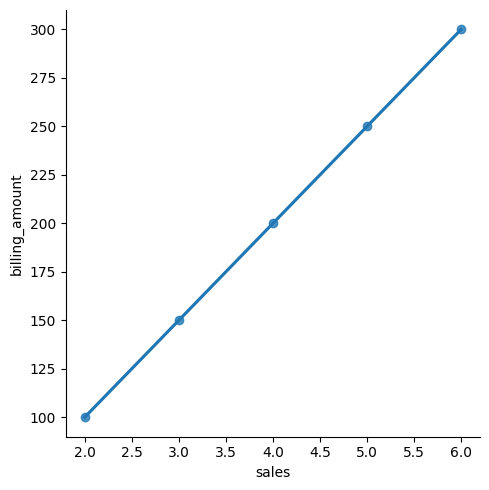

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de regresión lineal usando seaborn
sns.lmplot(x='sales', y='billing_amount', data=clients)
# Mostrar gráfico
plt.show()

#### Ploteado de la gráfica de relación entre variables del conjunto de datos ####

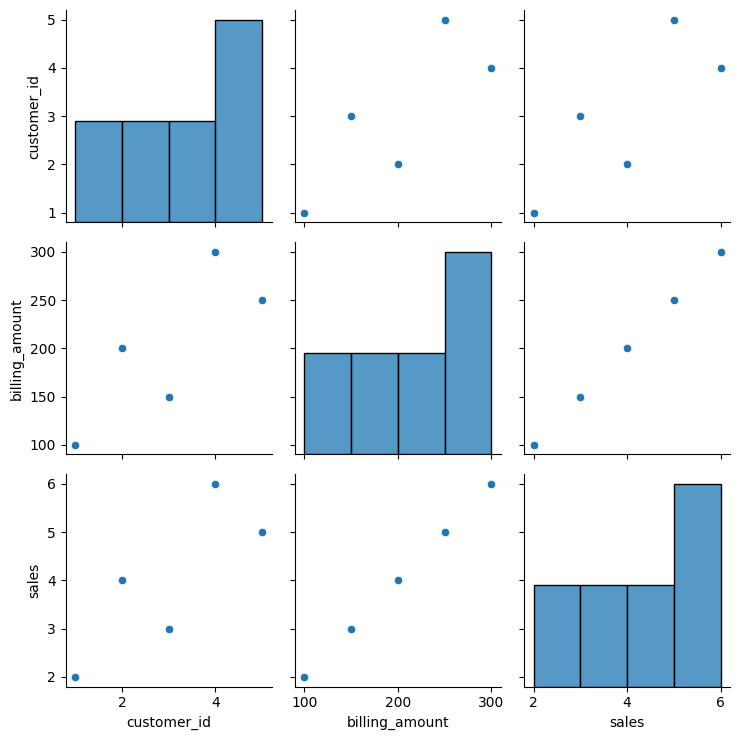

In [14]:
# Gráfico de relación entre variables del conjunto de datos.
sns.pairplot(clients, height=2.5)
plt.tight_layout()
plt.show()

#### Ploteado de la gráfica de datos de entrenamiento ####

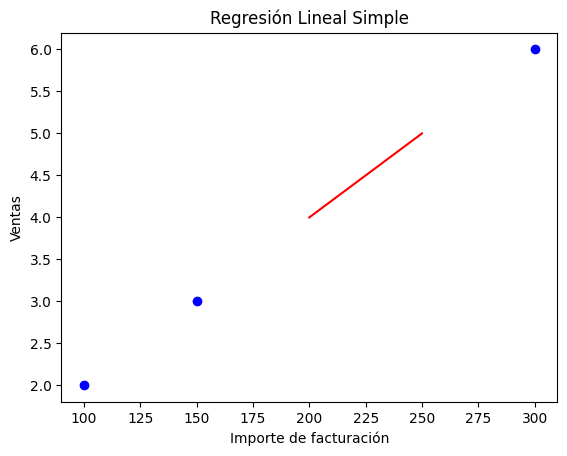

In [15]:
# Graficando los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue')

# Grafica de la regresión lineal con datos de la predicción
plt.plot(X_test, y_pred, color='red')
plt.title('Regresión Lineal Simple')
plt.xlabel('Importe de facturación')
plt.ylabel('Ventas')
plt.show()

Con esto ya tenemos creada una regresión lineal simple con Python.

Esta última gráfica, muestra los puntos de los datos de entrenamiento en color azul y la línea de regresión lineal en rojo.
La línea de regresión lineal representa el modelo que se ha entrenado para hacer predicciones.

La interpretación de la gráfica indica que, a medida que el número de ventas se incrementa, el importe de facturación también aumenta. Esto se ve reflejado en la pendiente positiva de la línea de regresión. Sin embargo, esta es una interpretación basada en una sola variable, si se utilizaran más variables se podría tener una interpretación más precisa y completa.

## REGRESIÓN LINEAL (Ejemplo 2)

#### Importamos librerías.

In [16]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 1. Generación del dataset simulado
Queremos predecir el precio de una vivienda (target) a partir de dos variables:
 - Tamaño en metros cuadrados (X1)
 - Número de habitaciones (X2)

In [17]:

np.random.seed(42)  # para reproducibilidad

# Generamos 200 muestras
n_samples = 200
X1 = np.random.normal(loc=100, scale=20, size=n_samples)  # Tamaño en m²
X2 = np.random.randint(1, 6, size=n_samples)  # Entre 1 y 5 habitaciones

Definimos una relación lineal con cierto ruido.  
Coeficientes: 2000 €/m² y 10000 €/habitación, y un intercepto de 50000 €

In [18]:
error = np.random.normal(loc=0, scale=10000, size=n_samples)  # ruido aleatorio
y = 2000 * X1 + 10000 * X2 + 50000 + error

Combinamos las variables predictoras en un DataFrame

In [19]:
data = pd.DataFrame({
    'Tamaño_m2': X1,
    'Num_Habitaciones': X2,
    'Precio': y
})

### 2. División del dataset en entrenamiento y test

In [20]:
X = data[['Tamaño_m2', 'Num_Habitaciones']]
y = data['Precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 3. Creación y entrenamiento del modelo de regresión lineal multivariable

In [21]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Imprimimos los coeficientes y el intercepto obtenidos

In [22]:

print("Intercepto (b₀):", modelo.intercept_)
print("Coeficientes (b₁, b₂):", modelo.coef_)

Intercepto (b₀): 57937.81951953229
Coeficientes (b₁, b₂): [1934.71153978 9749.68263101]


### 4. Evaluación del modelo con el conjunto de test

In [23]:

y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo:")
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)


Evaluación del modelo:
Error Cuadrático Medio (MSE): 91368642.96252188
Coeficiente de determinación (R²): 0.9423903718304878


### 5. Realización de una predicción sobre datos ficticios
Supongamos una vivienda de 120 m² y 3 habitaciones

In [24]:
nuevos_datos = np.array([[120, 3]])
prediccion = modelo.predict(nuevos_datos)
print("\nPredicción para una vivienda de 120 m² y 3 habitaciones:", prediccion[0])


Predicción para una vivienda de 120 m² y 3 habitaciones: 319352.252185602


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 6. Visualización 
Aunque la regresión es multivariable y la visualización completa es compleja,
graficaremos la relación real vs. predicha en el conjunto de test.

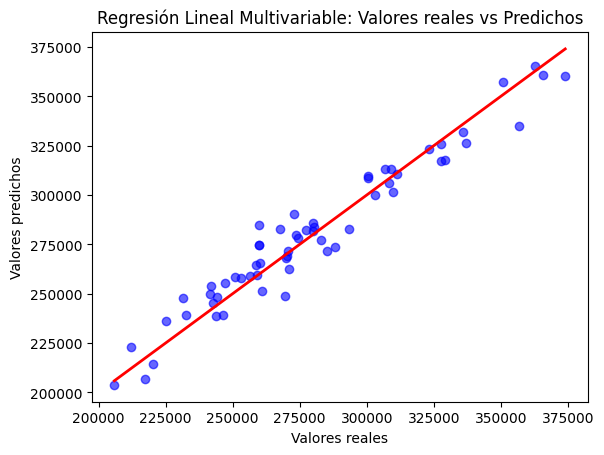

In [25]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión Lineal Multivariable: Valores reales vs Predichos')
plt.show()

## NOTA ACLARATORIA

### ¿Qué es el intercepto?

El **intercepto** es el valor de la variable objetivo (la que queremos predecir) cuando todas las variables independientes (o predictoras) son iguales a cero. Es decir, es el "punto de partida" del modelo.

En la fórmula de una regresión lineal, normalmente se expresa de la siguiente manera:

\[
y = b_0 + b_1 x_1 + b_2 x_2 + \cdots + b_n x_n
\]

donde:
- **\(y\)** es la variable que queremos predecir.
- **\(b_0\)** es el intercepto.
- **\(b_1, b_2, \dots, b_n\)** son los coeficientes o pendientes correspondientes a cada variable independiente \(x_1, x_2, \dots, x_n\).

Por lo tanto, cuando \(x_1 = 0, x_2 = 0, \dots, x_n = 0\), la ecuación se reduce a:

\[
y = b_0
\]

En este contexto, **\(b_0\)** indica el valor base o el punto en el que se sitúa la gráfica de la relación cuando no hay influencia de los demás factores.

---

En resumen, el intercepto es un parámetro clave que ayuda a situar la línea de regresión en el eje de la variable a predecir.